# Explore the Digit Recognizer Competition Dataset

In [1]:
import os
from dotenv import load_dotenv, find_dotenv
import zipfile
import pandas as pd
from pathlib import Path
import tensorflow as tf
import matplotlib.pyplot as plt

class DrDataLoader(object):
    """Digit Recognizer competitiion dataset loader
    """
    def __init__(self, dataset_fp):
        self.dataset_fp = dataset_fp

    def load_training_data(self):
        """Load training data.
        """
        archive = zipfile.ZipFile(self.dataset_fp, 'r')
        features = pd.read_csv(archive.open('train.csv'))
        target = features.pop('label')
        
        return tf.data.Dataset.from_tensor_slices((tf.convert_to_tensor(features, tf.uint8), target))

    def load_test_data(self):
        archive = zipfile.ZipFile(self.dataset_fp, 'r')
        features = pd.read_csv(archive.open('test.csv'))        
        return tf.data.Dataset.from_tensor_slices((tf.convert_to_tensor(features, tf.uint8)))

def show_helper(image, ax, label=None):
    ax.imshow(tf.reshape(image, [28,28]), cmap='gray_r', interpolation='None')
    if label is not None:
        ax.set_title('Label: {}'.format(label))
    return ax


2022-11-25 22:19:01.885960: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
N = 54000
data_loader = DrDataLoader(Path('../') / Path(os.getenv('RAW_FP'))) #type: ignore
train_ds = data_loader.load_training_data().shuffle(N)
test_ds = data_loader.load_test_data().shuffle(N)

2022-11-25 22:19:08.947225: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Training set examples

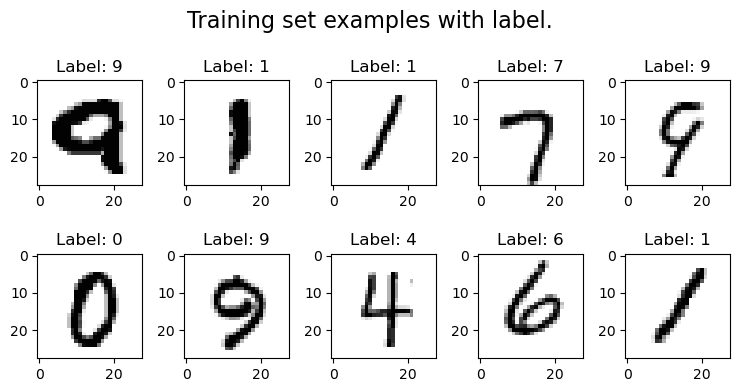

In [7]:
num_row = 2
num_col = 5
num = num_col * num_row
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
i=0
for (im, im_label) in train_ds.take(num):
    ax = axes[i//num_col, i%num_col] #type: ignore
    ax = show_helper(im, ax, im_label)
    i+=1
fig.suptitle('Training set examples with label.', fontsize=16)
plt.tight_layout()
plt.show()

## Test set examples

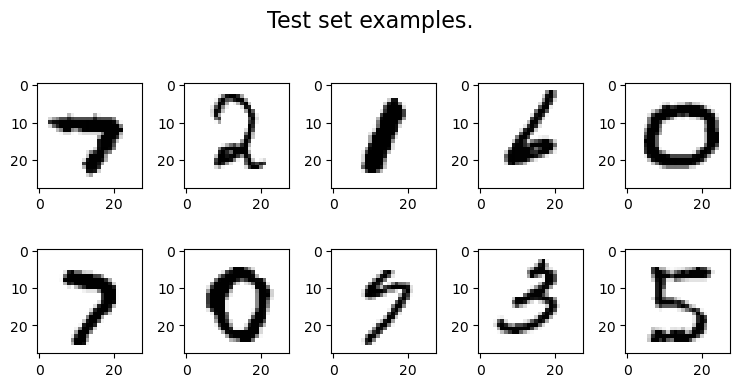

In [5]:
num_row = 2
num_col = 5
num = num_col * num_row
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
i=0
for im in test_ds.take(num):
    ax = axes[i//num_col, i%num_col] #type: ignore
    ax = show_helper(im, ax, None)
    i+=1
fig.suptitle('Test set examples.', fontsize=16)
plt.tight_layout()
plt.show()